# **TP07: Arbre de décision**
Un arbre de décision est un schéma représentant les résultats possibles d'une série de choix interconnectés.

Il permet d'évaluer différentes actions possibles en fonction de leur coût, leur probabilité, de leurs bénéfices. 

Il peut être utilisé  pour générer un algorithme qui détermine le meilleur choix de façon mathématique.

## **Partie I:Build decision tree model to predict survival based on certain parameters**
Les données sont stocker dans le fichier Titanic.csv qui contient des données des passagers du Titanic. Chaque ligne représente une personne. Les colonnes décrivent différents attributs de la personne, notamment si elle a survécu, son âge, sa classe de passagers, son sexe...

**Q1-** Importer les données

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=sns.load_dataset('titanic')

In [2]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Q2-Construire le Modèle d'arbre de décision en utilisant **"DecisionTreeClassifier"** de sklearn.tree 

Nous allons utiliser 80% du dataSet pour l'entrainement et 20% pour le teste du modèle.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df['sex'] = df['sex'].replace(['male','female'],[1,0])
df.dropna(axis=0, inplace=True)
X=np.array(df[['pclass','sex','age']])
Y=np.array(df[["alive"]])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [15]:
acc=len([1 for i in range(len(model.predict(X_test))) if(model.predict(X_test)[i]==y_test[i])])/len(y_test)
acc

0.7297297297297297

**Q3** Génér l'image de notre arbre

Text(31.387500000000003, 178.61142857142858, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')

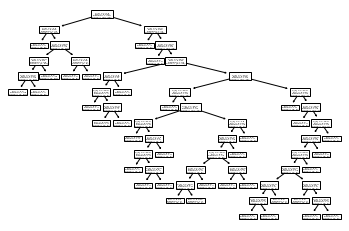

In [98]:
import sklearn.tree as tree
tree.plot_tree(model)[2]

**Q4- prediction** 

Voici des information de trois passagers:

passager1:  {"pclass": 1, "sex":1 , "age": 20}

passager2:  {"pclass": 2, "sex":1 , "age": 7}

passager3:  {"pclass": 3, "sex": 0, "age": 35}

1- Créer un DataFrame à partir de ce données

2- Lequel des passagers vont etre par les survivant?

3-Comparer les résultats avec la méthode du KNN

In [103]:
Data={'pclass':[1,2,3],'sex':[1,1,0],'age':[20,7,35]}
new_df=pd.DataFrame.from_dict(Data)
model.predict(new_df)

array(['no', 'yes', 'yes'], dtype=object)

## **Partie II**

Les données sont stocker dans le fichier salaries.csv qui contient des données des salariés. Chaque ligne représente une personne. Les colonnes décrivent différents attributs de la personne, notamment si elle a un salaire plus que 100K, la companie, diplome. 

L'objectif de cette partie est de prédire le salaire une personne en fonction de son diplome, profession et la company.

 **Q_1** Importer les données

**Q2-**1-Construiser X et Y 

X: les trois colonne "company","job" et "degrees"

y: "salary_more_then_100k"

2- Transformer la variable qualitatif ( utiliser **LabelEncoder** from **sklearn.preprocessing **)

-"company" en variable numérique( google=2,abc pharma=1, facebook=0)

-"job"en variable numérique( sales executive=2,computer programmer =1, business manager=0)

-"degrees"en variable numérique( bachelors=0,masters =1)




**Q3**- Construire le Modèle d'arbre de décision en utilisant **"DecisionTreeClassifier"** de sklearn.tree.

**Q4** Génér l'image de notre arbre

**Q4- prediction** 

Voici des information de trois salarié:

salaries1:  {"company": google, "job":computer programmer , "degrees": bachelor}

salaries2:  {"company": facebook, "job":computer programmer , "degrees": masters}

salaries3:  {"company": abc pharma, "job": business manager, "degrees": masters}

1- Créer un DataFrame à partir de ce données

2- Lequel des salariés vont avoir un salaire plus que 100K?